In [1]:
!pip install tensorflow 
!pip install tf-models-official
!pip install transformers
# !pip install -U tf-nightly

     |████████████████████████████████| 849kB 5.8MB/s 
     |████████████████████████████████| 1.1MB 16.3MB/s 
     |████████████████████████████████| 36.7MB 116kB/s 
     |████████████████████████████████| 358kB 41.8MB/s 
     |████████████████████████████████| 174kB 41.0MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20071 sha256=8425d34eeccde32aa2959f0d11197f7dfbabba63b020eb19b989973fa47003ad
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built py-cpuinfo
     |████████████████████████████████| 1.3MB 4.4MB/s 
     |████████████████████████████████| 2.9MB 32.8MB/s 
     |████████████████████████████████| 1.1MB 39.6MB/s 
     |████████████████████████████████| 890kB 36.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=b1a08872ee0a1ff0c19001900968108a6423e3244fda2f1b7c

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [2]:
## for data
import json
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing
import re
import nltk

## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## for word embedding
import gensim
import gensim.downloader as gensim_api

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

## for bert language model
import transformers

## for metrics
from sklearn import metrics

In [ ]:
#not required

from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1cG-u51Jo-8xmsPPuwO8BoBxIL_kkpQpA'})
myfile.GetContentFile('embold_train.json')

myfile = drive.CreateFile({'id': '1Hj-HRY047CD6lCctJRmzvilZQ7B1V8oB'})
myfile.GetContentFile('embold_train_extra.json')

myfile = drive.CreateFile({'id': '1Gxw02RsKB58IutkNs49nn70p_yEaQZwn'})
myfile.GetContentFile('embold_test.json')

myfile = drive.CreateFile({'id': '1P5nHUuOVvjX-rjJ7XAeoJAeapaC7OIcd'})
myfile.GetContentFile('train_clean.json')

myfile = drive.CreateFile({'id': '1hKcZ-qIJrHBKZtRwV2Dh5F2IMS1t0rYV'})
myfile.GetContentFile('12k_Clean_v5.csv')

In [ ]:
# not required

df = pd.read_json('embold_train.json')
df_extra = pd.read_json('embold_train_extra.json')
df_test = pd.read_json('embold_test.json')
# df_train = pd.read_json('train_clean.json')
df_train = pd.read_csv('12k_Clean_v5.csv')

In [3]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1u_cFytKNg85zbSz-jmDAy-Rh5iOLvVoK'})
myfile.GetContentFile('finalized.csv')

df_train = pd.read_csv('finalized.csv')

In [ ]:
# not required
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile = drive.CreateFile({'id': '1rza0jSSvCDDIdxYB6n303kgTQxNldq_c'})
myfile.GetContentFile('cleaner_4lakh.csv')

df_train = pd.read_csv('cleaner_4lakh.csv')

In [4]:
df_train

,text,label
0,y zoom piano roll y zoom piano roll use,1
1,buggy behavior in selection screenshot r,0
2,auto update feature hi great job so far auto u...,1
3,filter out noisy endpoints in logs request hea...,1
4,enable pid on pid off alarm actions for arduin...,0
...,...,...
449995,shield against invalid dates render now datefo...,0
449996,fix the knight serious if just one thing week,0
449997,portaudio playback binding crashes often ubunt...,0
449998,add db path option for allowing user to specif...,1


In [5]:
## distil-bert tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

In [ ]:
#not required 

# df_train = pd.concat([df,df_extra], axis=0)
# df_train = df_train.reset_index()
for i in range(len(df_train)):
  if df_train['body'][i] == '' or str(df_train['body'][i]) == 'nan':
    a = ""
    for j in df['body'][i].split(" "):
      if j.isalpha():
        a = a + j + " "
    df_train['body'][i] = a
    print("Body nan found: ",i)

  elif df_train['title'][i] == '' or str(df_train['title'][i]) == 'nan':
    a = ""
    for j in df['title'][i].split(" "):
      if j.isalpha():
        a = a + j + " "
    df_train['title'][i] = a
    print("Title nan found: ",i)

  if df_train['title'][i] == '' or str(df_train['title'][i]) == 'nan' or df_train['body'][i] == '' or str(df_train['body'][i]) == 'nan':
    continue

  df_train["title"][i] += " " + df_train["body"][i]
  if i%1000 == 0:
    print(i)

df_train = df_train.drop(columns=['body'])
df_train = df_train.rename(columns={"title":"text"})  
df_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Body nan found:  989
1000
Body nan found:  1005
Body nan found:  1190
Body nan found:  1465
Body nan found:  1542
Body nan found:  1580
Body nan found:  1644
2000
Body nan found:  2307
Body nan found:  2759
3000
Body nan found:  3089
Body nan found:  3487
Title nan found:  3573
Body nan found:  3700


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Body nan found:  3986
4000
Body nan found:  4042
Body nan found:  4933
5000
Body nan found:  5178
Title nan found:  5437
Body nan found:  5729
Body nan found:  5910
6000
Body nan found:  6091
Body nan found:  6625
Body nan found:  6988
7000
Body nan found:  7058
Title nan found:  7357
Body nan found:  7560
Title nan found:  7975
8000
Title nan found:  8144
Title nan found:  8555
Title nan found:  8588
Body nan found:  8668
Body nan found:  8944
9000
Body nan found:  9307
Title nan found:  9552
Body nan found:  9671
Title nan found:  9840
10000
Body nan found:  10034
Body nan found:  10094
Title nan found:  10187
Body nan found:  10391
Title nan found:  10463
Body nan found:  10531
11000
Body nan found:  11051
Body nan found:  11108
Title nan found:  11598
12000
Body nan found:  12109
Body nan found:  12915
Body nan found:  12918
13000
Body nan found:  13132
14000
Body nan found:  14008
Body nan found:  14148
Body nan found:  14436
Body nan found:  14566
Body nan found:  14696
Body nan 

,label,text
0,1,piano roll zoom piano roll would be use
1,0,buggi behavior select screenshot
2,1,auto updat featur hi great job so far auto upd...
3,1,filter out noisi endpoint log think should sto...
4,0,enabl pid pid alarm action expect behavioralar...
...,...,...
149995,1,suggest getinventorylist should return random ...
149996,0,decod display neurovault imag incorrectli note...
149997,0,parser should return not except raml testbaseu...
149998,0,errorexcept array str convers php artisan see ...


In [ ]:
from google.colab import files
# df_train.to_json('train_clean.json')
files.download('train_clean.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for x in range(3700, len(df_train)):
    a = " "
    for i in df_train.iloc[x,1].split(" "):
        if not i.isalpha():
          continue
        a = a + i + " "
        df_train.iloc[x,1] = a
    if x%500 == 0:
      print(x, ":", df_train.iloc[x,1] )

In [ ]:
nltk.download("stopwords")
nltk.download('wordnet')
lst_stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
# X = df_train.iloc[:,0:2].values
# y = df_train.iloc[:,-1].values

from sklearn.model_selection import train_test_split
dtf_train, dtf_test = train_test_split(df_train, test_size=0.3)

## get target
y_train = dtf_train["label"].values
y_test = dtf_test["label"].values

In [7]:
corpus = dtf_train["text"]
maxlen = 50

## add special tokens
maxqnans = np.int((maxlen-20)/2)

corpus_tokenized = ["[CLS] "+
             " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', 
             str(txt).lower().strip()))[:maxqnans])+
             " [SEP] " for txt in corpus]

## generate masks
masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(
           txt.split(" "))) for txt in corpus_tokenized]
    
## padding
txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
    
## generate idx
idx = [tokenizer.encode(seq.split(" "))[0:50] for seq in txt2seq]
    
## generate segments
segments = [] 
for seq in txt2seq:
    temp, i = [], 0
    for token in seq.split(" "):
        temp.append(i)
        if token == "[SEP]":
             i += 1
    segments.append(temp)
## feature matrix
X_train = [np.asarray(idx, dtype='int32'), 
           np.asarray(masks, dtype='int32'), 
           np.asarray(segments, dtype='int32')]

In [ ]:
len(X_test)

3

In [ ]:
i = 0
print("txt: ", dtf_train["text"].iloc[0])
print("tokenized:", [tokenizer.convert_ids_to_tokens(idx) for idx in X_train[0][i].tolist()])
print("idx: ", X_train[0][i])
print("mask: ", X_train[1][i])
print("segment: ", X_train[2][i])

txt:  login logout implementation encrypt rest api access token
tokenized: ['[CLS]', '[CLS]', 'log', '##in', 'logo', '##ut', 'implementation', 'en', '##cr', '##yp', '##t', 'rest', 'api', 'access', 'token', '[SEP]', '[UNK]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
idx:  [  101   101  8833  2378  8154  4904  7375  4372 26775 22571  2102  2717
 17928  3229 19204   102   100     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
mask:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
segment:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 

In [8]:
corpus = dtf_test["text"]
maxlen = 50

## add special tokens
maxqnans = np.int((maxlen-20)/2)

corpus_tokenized = ["[CLS] "+
             " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', 
             str(txt).lower().strip()))[:maxqnans])+
             " [SEP] " for txt in corpus]

## generate masks
masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(
           txt.split(" "))) for txt in corpus_tokenized]
    
## padding
txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
    
## generate idx
idx = [tokenizer.encode(seq.split(" "))[0:50] for seq in txt2seq]
    
## generate segments
segments = [] 
for seq in txt2seq:
    temp, i = [], 0
    for token in seq.split(" "):
        temp.append(i)
        if token == "[SEP]":
             i += 1
    segments.append(temp)
## feature matrix
X_test = [np.asarray(idx, dtype='int32'), 
           np.asarray(masks, dtype='int32'), 
           np.asarray(segments, dtype='int32')]

In [9]:
## inputs
idx = layers.Input((50), dtype="int32", name="input_idx")
masks = layers.Input((50), dtype="int32", name="input_masks")
## pre-trained bert with config
config = transformers.DistilBertConfig(dropout=0.2, 
           attention_dropout=0.2)
config.output_hidden_states = False
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
bert_out = nlp(idx, attention_mask=masks)[0]
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out)
x = layers.Dense(64, activation="relu")(x)
y_out = layers.Dense(len(np.unique(y_train)), 
                     activation='softmax')(x)
## compile
model = models.Model([idx, masks], y_out)
for layer in model.layers[:3]:
    layer.trainable = False
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_idx (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB ((None, 50, 768),)   66362880    input_idx[0][0]                  
                                                                 input_masks[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 768)          0           tf_distil_bert_model[0

In [ ]:
y_test

array([2, 1, 1, ..., 1, 0, 1])

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=64, 
                     epochs=1, shuffle=True, verbose=1, 
                     validation_split=0.3)
## test
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

  53/3446 [..............................] - ETA: 4:59:36 - loss: 0.8648 - accuracy: 0.6064

In [ ]:
model.save("nlp.model")

In [ ]:
from google.colab import files
files.download('nlp.model')

Accuracy: 0.68
Auc: 0.79
Detail:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     20071
           1       0.67      0.77      0.72     20702
           2       0.66      0.06      0.10      4227

    accuracy                           0.68     45000
   macro avg       0.67      0.52      0.51     45000
weighted avg       0.68      0.68      0.66     45000



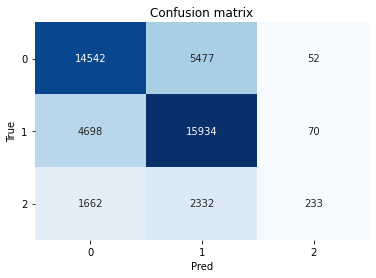

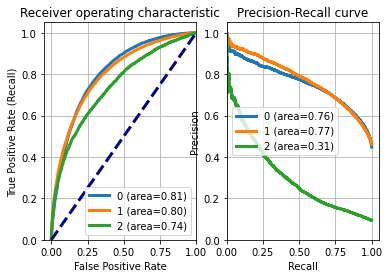

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
corpus = df_train["text"]

## create list of lists of unigrams
lst_corpus = []
i = 0
for string in corpus:
   if str(string) =='nan':
     continue
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

In [ ]:
nlp.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer

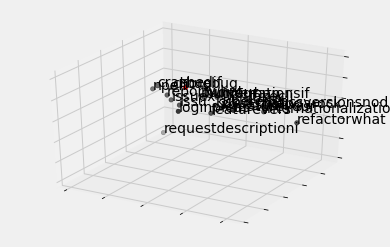

In [ ]:
word = "bug"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
df_train.to_csv('tsne.csv')
from google.colab import files
files.download('tsne.csv')

In [ ]:
def preprocess(text):
  dtf = pd.DataFrame({'text' : text})
  corpus = dtf["text"]
  maxlen = 50

  ## add special tokens
  maxqnans = 15

  corpus_tokenized = ["[CLS] "+
              " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', 
              str(txt).lower().strip()))[:maxqnans])+
              " [SEP] " for txt in corpus]

  ## generate masks
  masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(
            txt.split(" "))) for txt in corpus_tokenized]
      
  ## padding
  txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
      
  ## generate idx
  idx = [tokenizer.encode(seq.split(" "))[0:50] for seq in txt2seq]
      
  ## generate segments
  segments = [] 
  for seq in txt2seq:
      temp, i = [], 0
      for token in seq.split(" "):
          temp.append(i)
          if token == "[SEP]":
              i += 1
      segments.append(temp)
  ## feature matrix
  X_pred = [np.asarray(idx, dtype='int32'), 
            np.asarray(masks, dtype='int32'), 
            np.asarray(segments, dtype='int32')]

  return X_pred

def predict(text):
  X_pred = preprocess(text)

  predicted_prob = model.predict(X_test)
  predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
              predicted_prob]
            
  print(predicted)
        



In [ ]:
import numpy as np
import pandas as pd
np.int((30)/2)

15